# **NovaPay Exploratory Data Analysis**

## Using Nova_cleaned_df.csv to explore and engineer features.

* Load the cleaned dataset
* Understand fraud vs non-fraud patterns
* Distribution plots and correlations
* Create buckets for clearer features visualization


In [648]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load cleaned data

In [650]:
df = pd.read_csv("../data/Nova_cleaned_df.csv")

# To check the number of rows and columns
print("\n📌 Dataset Shape:", df.shape)

# Print the top 5 rows
df.head()


📌 Dataset Shape: (11137, 26)


,transaction_id,customer_id,timestamp,home_country,source_currency,dest_currency,channel,amount_src,amount_usd,fee,...,ip_risk_score,kyc_tier,account_age_days,device_trust_score,chargeback_history_count,risk_score_internal,txn_velocity_1h,txn_velocity_24h,corridor_risk,is_fraud
0,fee8542d-8ee6-4b0d-9671-c294dd08ed26,402cccc9-28de-45b3-9af7-cc5302aa1f93,2022-10-03 18:40:59.468549+00:00,US,USD,CAD,ATM,278.19,278.19,4.25,...,0.123,STANDARD,263,0.522,0,0.223,0,0,0.0,0
1,bfdb9fc1-27fe-4a85-b043-4d813d679259,67c2c6b3-ef0a-4777-a3f1-c84a851bb6ad,2022-10-03 20:39:38.468549+00:00,CA,CAD,MXN,WEB,208.51,154.29,4.24,...,0.569,STANDARD,947,0.475,0,0.268,0,1,0.0,0
2,fc855034-3ea5-4993-9afa-b511d93fe5e8,6d0d9b27-fa26-45f8-93b1-2df29d182d9c,2022-10-03 23:02:43.468549+00:00,US,USD,CNY,MOBILE,160.33,160.33,2.70,...,0.437,ENHANCED,367,0.939,0,0.176,0,0,0.0,0
3,2cf8c08e-42ec-444d-a755-34b9a2a0a4ca,7bd5200c-5d19-44f0-9afe-8b339a05366b,2022-10-04 01:08:53.468549+00:00,US,USD,EUR,MOBILE,59.41,59.41,2.22,...,0.594,STANDARD,147,0.551,0,0.391,0,0,0.0,0
4,d907a74d-b426-438d-97eb-dbe911aca91c,70a93d26-8e3a-4179-900c-a4a7a74d08e5,2022-10-04 09:35:03.468549+00:00,US,USD,INR,MOBILE,200.96,200.96,3.61,...,0.121,ENHANCED,257,0.894,0,0.257,0,0,0.0,0


## Dataset Overview

#### Basic information about data types & missing values

In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11137 entries, 0 to 11136
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             11137 non-null  object 
 1   customer_id                11137 non-null  object 
 2   timestamp                  11137 non-null  object 
 3   home_country               11137 non-null  object 
 4   source_currency            11137 non-null  object 
 5   dest_currency              11137 non-null  object 
 6   channel                    11137 non-null  object 
 7   amount_src                 11137 non-null  float64
 8   amount_usd                 11137 non-null  float64
 9   fee                        11137 non-null  float64
 10  exchange_rate_src_to_dest  11137 non-null  float64
 11  device_id                  11137 non-null  object 
 12  new_device                 11137 non-null  int64  
 13  ip_address                 11137 non-null  obj

In [653]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

## Exploratory Data Analysis

### Univariate Analysis

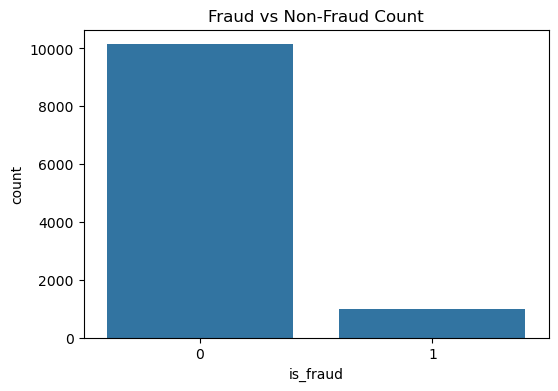

Fraud Rate: 8.92 %


In [655]:
# FRAUD DISTRIBUTION

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="is_fraud")
plt.title("Fraud vs Non-Fraud Count")
plt.show()

fraud_rate = df["is_fraud"].mean()
print("Fraud Rate:", round(fraud_rate*100, 2), "%")


### Numeric Column Distributions

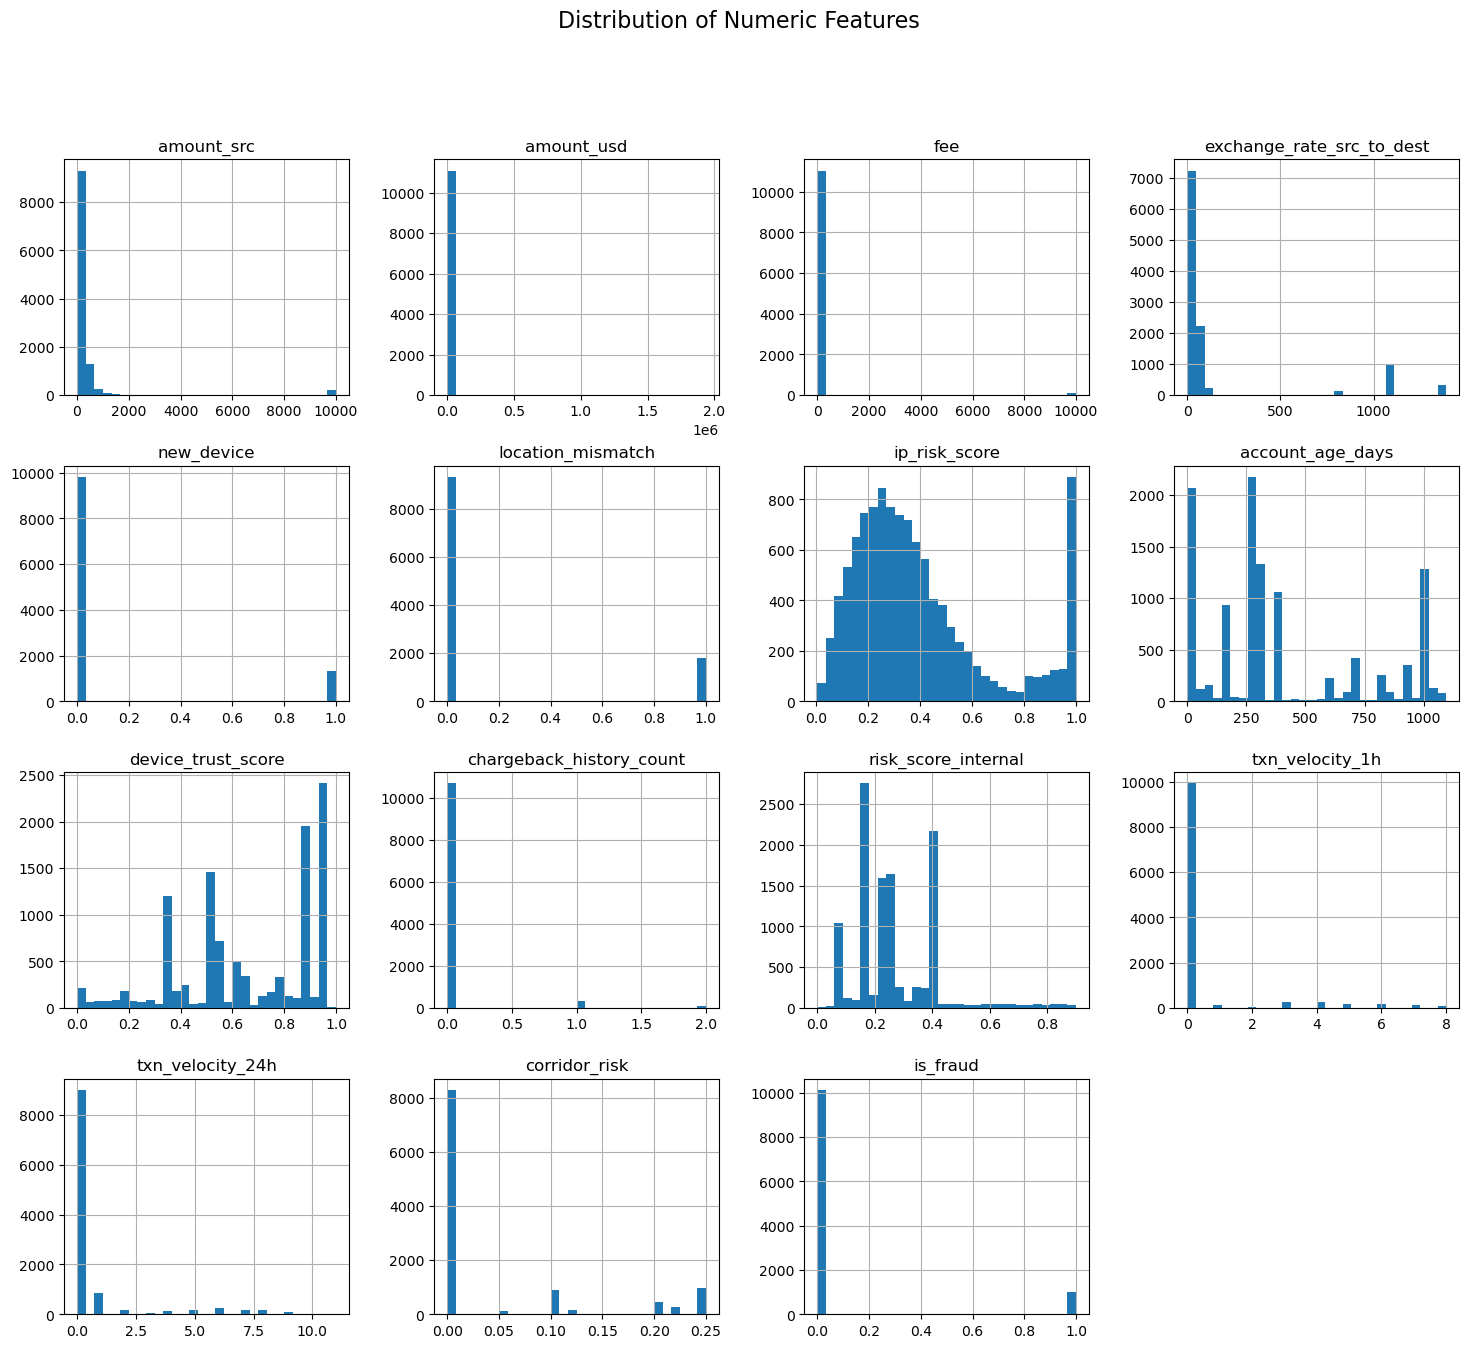

In [657]:
# Explore numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(bins=30, figsize=(18,15))
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()

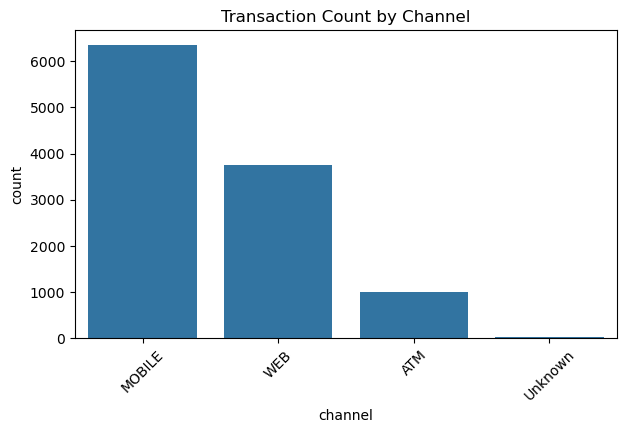

In [658]:
# Explore channel usage

plt.figure(figsize=(7,4))
sns.countplot(data=df, x="channel", order=df["channel"].value_counts().index)
plt.title("Transaction Count by Channel")
plt.xticks(rotation=45)
plt.show()


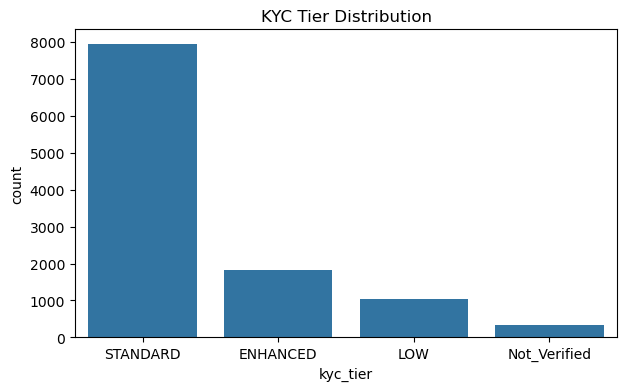

In [659]:
# KYC tier distribution

plt.figure(figsize=(7,4))
sns.countplot(x=df["kyc_tier"])
plt.title("KYC Tier Distribution")
plt.show()

location_mismatch
0    0.036052
1    0.361585
Name: is_fraud, dtype: float64


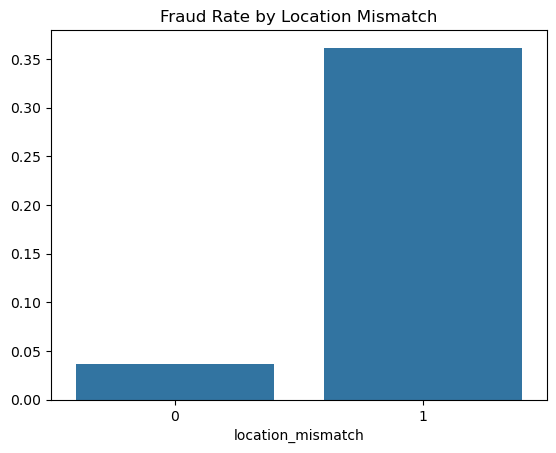

In [660]:
# Fraud Rate Where IP Does NOT Match Home Country

mismatch_rate = df.groupby("location_mismatch")["is_fraud"].mean()
print(mismatch_rate)

sns.barplot(x=mismatch_rate.index, y=mismatch_rate.values)
plt.title("Fraud Rate by Location Mismatch")
plt.show()

### Bivariate Analysis

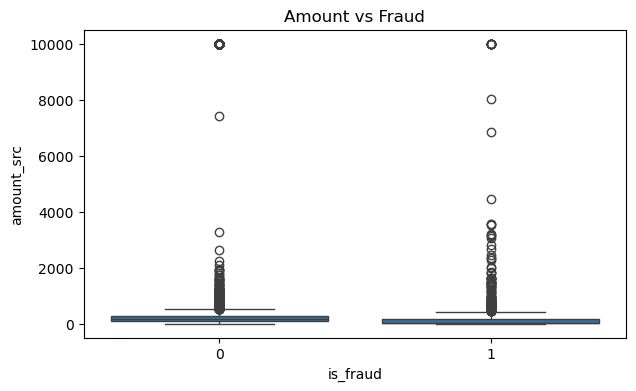

In [662]:
# Explore Fraud vs Amount

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="is_fraud", y="amount_src")
plt.title("Amount vs Fraud")
plt.show()


***Insight:*** This shows that fraudulent transactions (is_fraud = 1) tend to have higher transaction amounts and greater variability compared to non-fraudulent transactions. This suggests that fraud cases are more likely to involve larger amounts and extreme outliers, while legitimate transactions are generally more concentrated within a lower range.

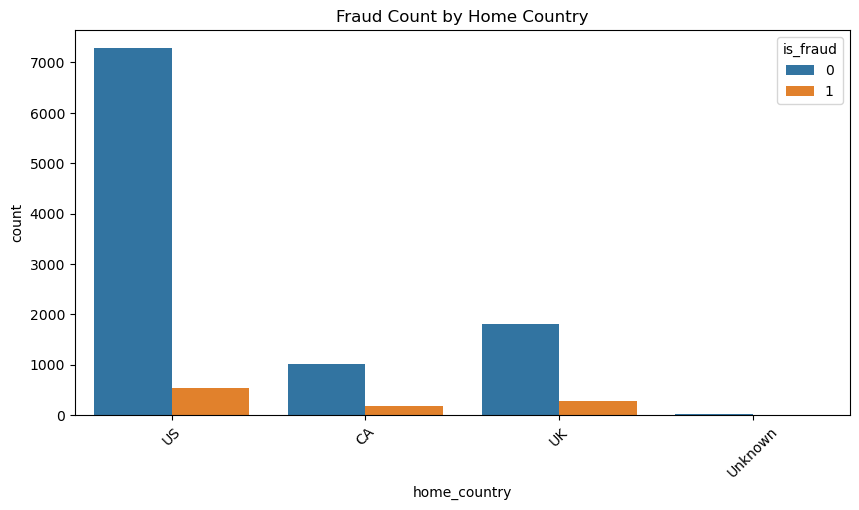

In [664]:
# Fraud by Home Country

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="home_country", hue="is_fraud")
plt.title("Fraud Count by Home Country")
plt.xticks(rotation=45)
plt.show()


***Insight:*** This indicates that fraud occurrences are unevenly distributed across home countries. While countries with higher overall transaction volumes naturally show more fraud cases, some countries display a relatively higher proportion of fraudulent transactions compared to others. This suggests that geographic factors may influence fraud risk and that certain countries could benefit from enhanced monitoring or targeted fraud controls.

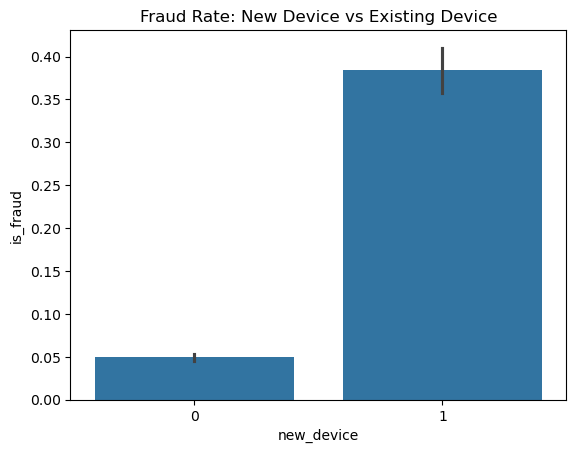

In [666]:
# Fraud Rate by New Device

sns.barplot(data=df, x="new_device", y="is_fraud")
plt.title("Fraud Rate: New Device vs Existing Device")
plt.show()

***Insight:*** This shows that transactions made from new devices have a higher fraud rate compared to those from existing devices. This indicates that device novelty is a strong risk signal, as fraudsters are more likely to use previously unseen or untrusted devices than established ones.

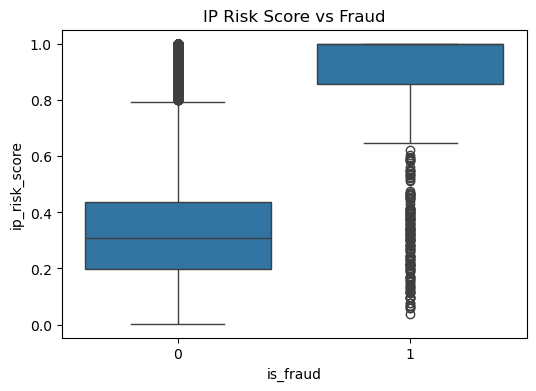

In [668]:
# IP Risk Score vs Fraud

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="is_fraud", y="ip_risk_score")
plt.title("IP Risk Score vs Fraud")
plt.show()

***Insight:*** This shows that fraudulent transactions (is_fraud = 1) have higher IP risk scores and greater variability compared to non-fraudulent transactions. This indicates that IP risk score is strongly associated with fraud, with higher scores signaling a greater likelihood of fraudulent activity.

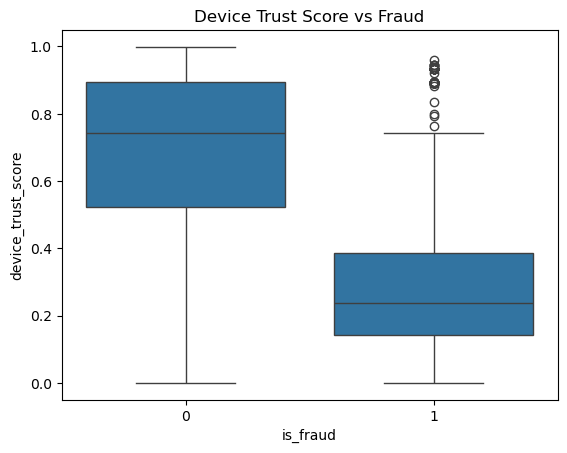

In [670]:
# Device Trust Score vs Fraud
sns.boxplot(data=df, x="is_fraud", y="device_trust_score")
plt.title("Device Trust Score vs Fraud")
plt.show()

***Insight*** This indicates that fraudulent transactions (is_fraud = 1) are associated with lower device trust scores compared to non-fraudulent transactions. This suggests that less trusted or unfamiliar devices are more likely to be involved in fraud, making device trust score an effective indicator for fraud detection.

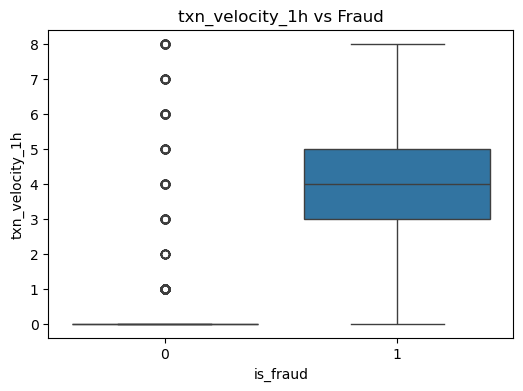

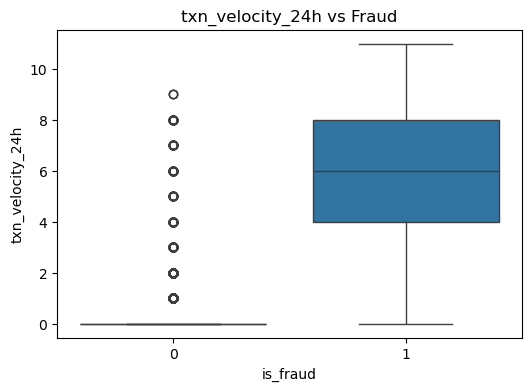

In [672]:
#  Fraud vs VELOCITY FEATURES (txn_velocity_1h, txn_velocity_24h)
velocity = ["txn_velocity_1h", "txn_velocity_24h"]

for col in velocity:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="is_fraud", y=col)
    plt.title(f"{col} vs Fraud")
    plt.show()

***Insight:*** This indicate that fraudulent transactions (is_fraud = 1) are associated with higher transaction velocity in both the last 1 hour and 24 hours compared to non-fraudulent transactions. Fraud cases also show greater spread and more extreme values, suggesting that fraud often involves bursts of repeated or rapid transactions rather than isolated events.

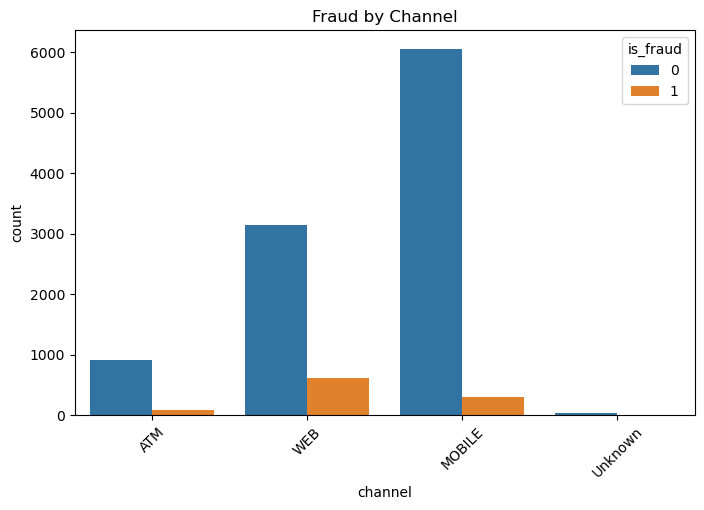

In [674]:
# Fraud rate by Transaction channel
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="channel", hue="is_fraud")
plt.title("Fraud by Channel")
plt.xticks(rotation=45)
plt.show()

***Insight:*** Fraud levels differ across transaction channels, suggesting channel-specific risk patterns, with Web having the highest fraud rate.

Text(0.5, 0, 'kyc_tier')

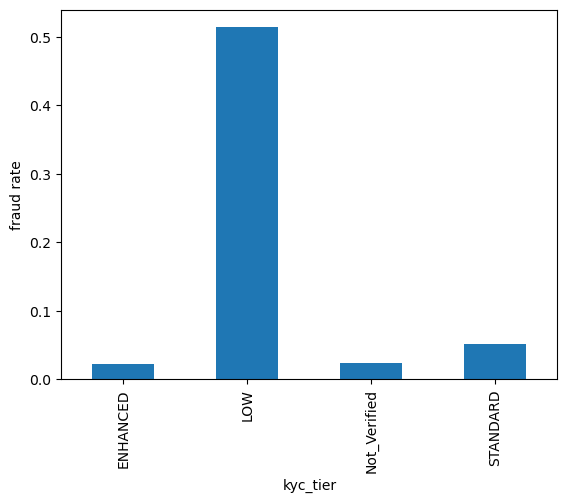

In [676]:
# Fraud rate by KYC

df.groupby("kyc_tier")["is_fraud"].mean().plot.bar()
plt.ylabel("fraud rate")
plt.xlabel("kyc_tier")

***Insight:*** This shows a clear relationship between KYC tier and fraud rate. Lower KYC tiers exhibit higher fraud rates, while higher KYC tiers show progressively lower fraud rates. This suggests that stronger identity verification significantly reduces fraud risk.

### Multivariate Analysis

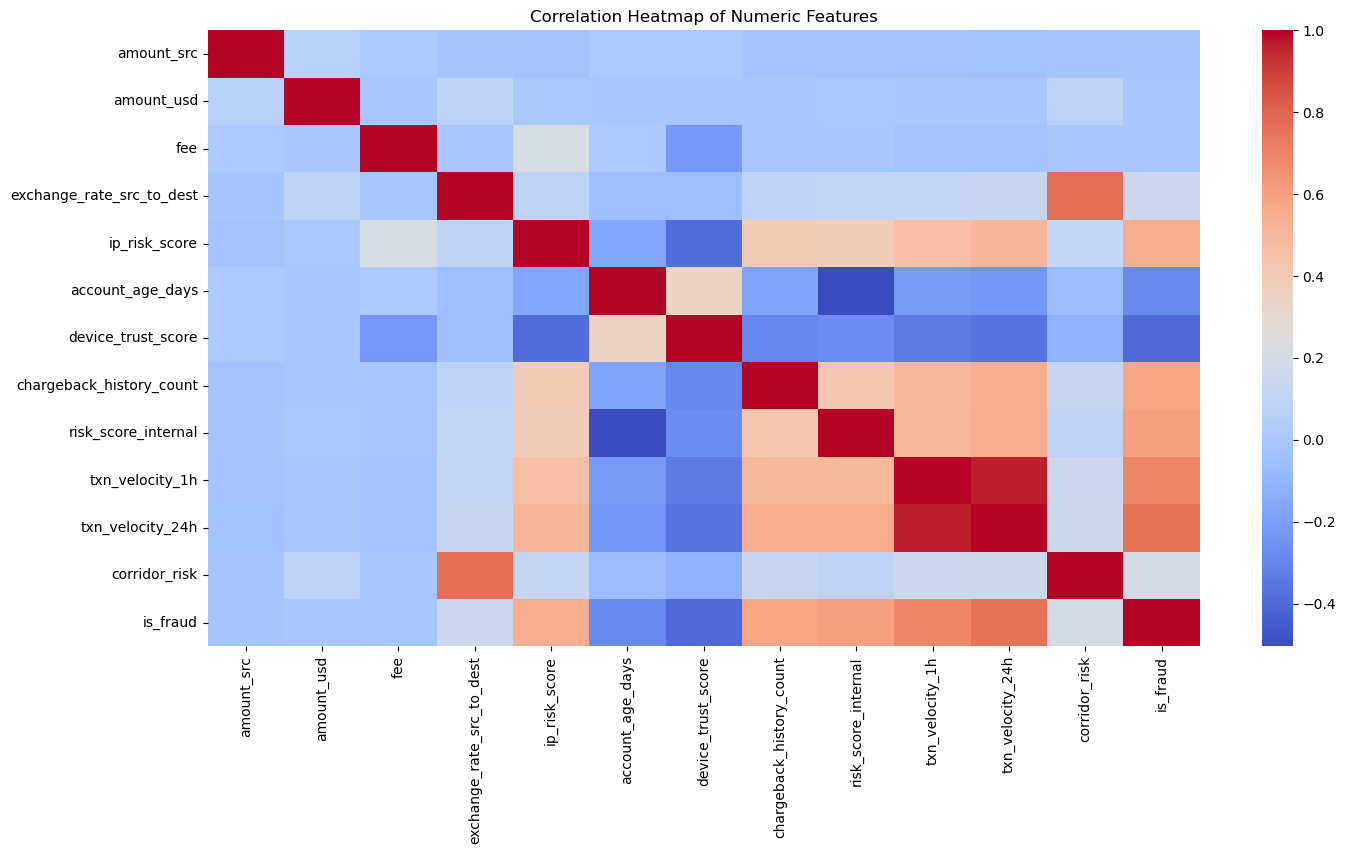

In [679]:
# Examine the correlation between the numerical columns

plt.figure(figsize=(16,8))
sns.heatmap(df[['amount_src', 'amount_usd', 'fee', 'exchange_rate_src_to_dest', 'ip_risk_score', 'account_age_days', 'device_trust_score', 'chargeback_history_count', 'risk_score_internal', 'txn_velocity_1h', 'txn_velocity_24h', 'corridor_risk', 'is_fraud']].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

***General Insight:*** The correlation heatmap shows that fraud is not driven by a single numeric feature, but rather by a combination of risk signals. Stronger positive correlations with fraud are observed for risk-oriented features such as internal risk score, IP risk score, transaction velocity, and chargeback history. 


device_trust_score
Low<0.3     0.849791
0.3-0.5     0.113714
0.5-0.7     0.020927
0.7-0.9     0.032920
High>0.9    0.008268
Name: is_fraud, dtype: float64


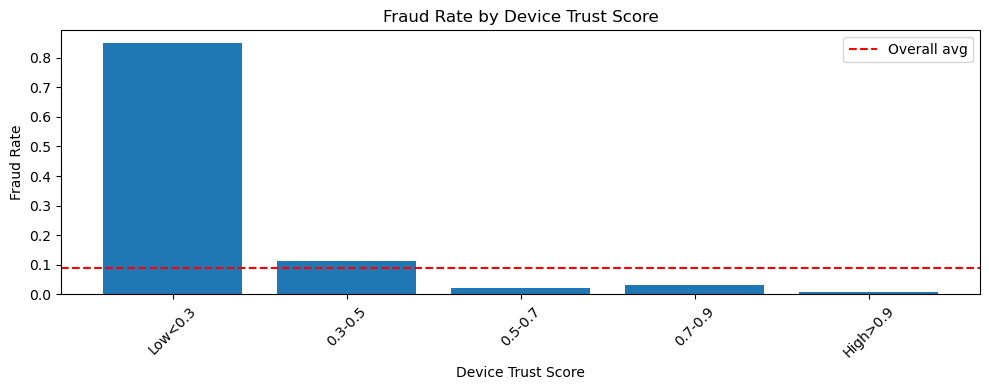

In [681]:
# Fraud rate by device trust score buckets

device_trust_bucket = pd.cut(df['device_trust_score'], 
                                   bins=[0, 0.3, 0.5, 0.7, 0.9, 1.0], 
                                   labels = ['Low<0.3', '0.3-0.5', '0.5-0.7', '0.7-0.9', 'High>0.9'])

fraud_by_device = df.groupby(device_trust_bucket, observed=True)['is_fraud'].mean()
print(fraud_by_device)

plt.figure(figsize=(10,4))
plt.bar(range(len(fraud_by_device)), fraud_by_device.values)
plt.xticks(range(len(fraud_by_device)), fraud_by_device.index, rotation=45)
plt.xlabel('Device Trust Score')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Device Trust Score')
plt.axhline(y=df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg')
plt.legend()
plt.tight_layout()
plt.show()

ip_risk_score
Low<0.3     0.015188
0.3-0.5     0.022407
0.5-0.7     0.029963
0.7-0.9     0.227273
High>0.9    0.618007
Name: is_fraud, dtype: float64


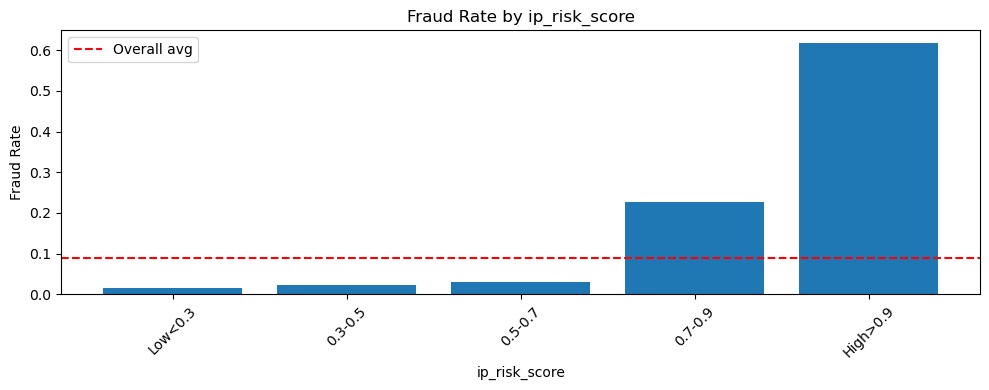

In [682]:
# Fraud rate by ip risk score buckets

ip_risk_bucket = pd.cut(df['ip_risk_score'], 
                              bins=[0, 0.3, 0.5, 0.7, 0.9, 1.0], 
                              labels = ['Low<0.3', '0.3-0.5', '0.5-0.7', '0.7-0.9', 'High>0.9'])

fraud_by_device = df.groupby(ip_risk_bucket, observed=True)['is_fraud'].mean()
print(fraud_by_device)

plt.figure(figsize=(10,4))
plt.bar(range(len(fraud_by_device)), fraud_by_device.values)
plt.xticks(range(len(fraud_by_device)), fraud_by_device.index, rotation=45)
plt.xlabel('ip_risk_score')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by ip_risk_score')
plt.axhline(y=df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg')
plt.legend()
plt.tight_layout()
plt.show()

amount_usd
<$100       0.018868
$100-500    0.061159
$500-1k     0.291768
$1-2k       0.647273
$2k-5k      0.777778
>$5         0.114391
Name: is_fraud, dtype: float64


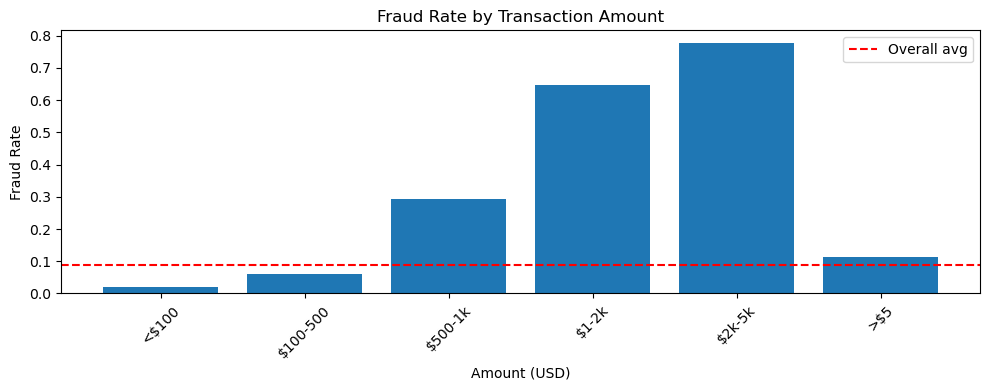

In [683]:
# Fraud rate by amount buckets
amount_bucket = pd.cut(df['amount_usd'],
                            bins=[0, 100, 500, 1000, 2000, 5000, 20000],
                            labels=['<$100', '$100-500', '$500-1k', '$1-2k', '$2k-5k', '>$5'])

fraud_by_amount = df.groupby(amount_bucket, observed=True)['is_fraud'].mean()
print(fraud_by_amount)

plt.figure(figsize=(10, 4))
plt.bar(range(len(fraud_by_amount)), fraud_by_amount.values)
plt.xticks(range(len(fraud_by_amount)), fraud_by_amount.index, rotation=45)
plt.xlabel('Amount (USD)')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Transaction Amount')
plt.axhline(y=df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg')
plt.legend()
plt.tight_layout()
plt.show()

txn_velocity_1h
0    0.018037
1    0.000000
2    0.000000
3    0.835878
4    0.838843
5    0.809524
6    0.704142
7    0.690265
8    0.477273
Name: is_fraud, dtype: float64


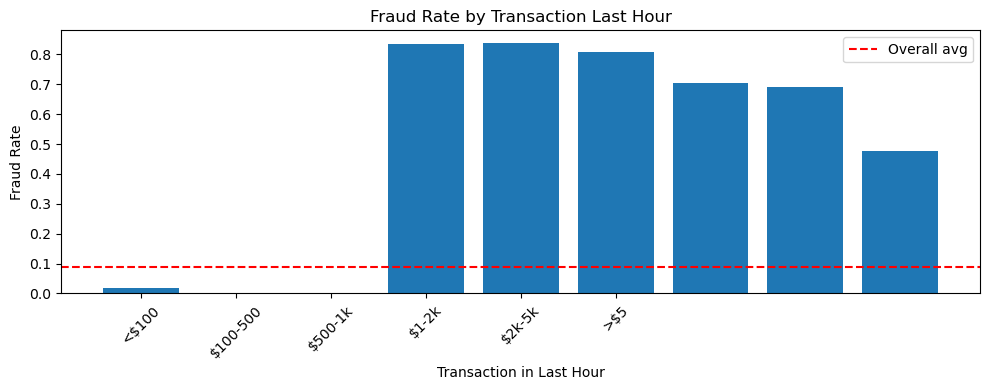

In [684]:
# Fraud rate by velocity (1h)

fraud_by_velocity_1h = df.groupby('txn_velocity_1h')['is_fraud'].mean()
print(fraud_by_velocity_1h)

plt.figure(figsize=(10, 4))
plt.bar(range(len(fraud_by_velocity_1h)), fraud_by_velocity_1h.values)
plt.xticks(range(len(fraud_by_amount)), fraud_by_amount.index, rotation=45)
plt.xlabel('Transaction in Last Hour')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Transaction Last Hour')
plt.axhline(y=df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg')
plt.legend()
plt.tight_layout()
plt.show()

txn_velocity_24h
0     0.018299
1     0.016607
2     0.000000
3     0.042254
4     0.572464
5     0.790123
6     0.796813
7     0.806283
8     0.730539
9     0.964286
10    1.000000
11    1.000000
Name: is_fraud, dtype: float64


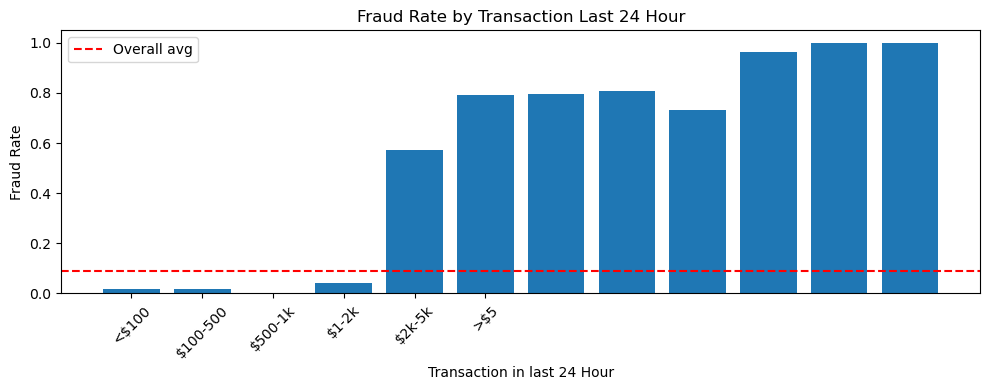

In [685]:
# Fraud rate by velocity (24h)

fraud_by_velocity_24h = df.groupby('txn_velocity_24h')['is_fraud'].mean()
print(fraud_by_velocity_24h)

plt.figure(figsize=(10, 4))
plt.bar(range(len(fraud_by_velocity_24h)), fraud_by_velocity_24h.values)
plt.xticks(range(len(fraud_by_amount)), fraud_by_amount.index, rotation=45)
plt.xlabel('Transaction in last 24 Hour')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Transaction Last 24 Hour')
plt.axhline(y=df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg')
plt.legend()
plt.tight_layout()
plt.show()

account_age_days
<30d        0.355789
30-90d      0.437647
90-180d     0.025176
180-365d    0.016944
>1yr        0.007784
Name: is_fraud, dtype: float64


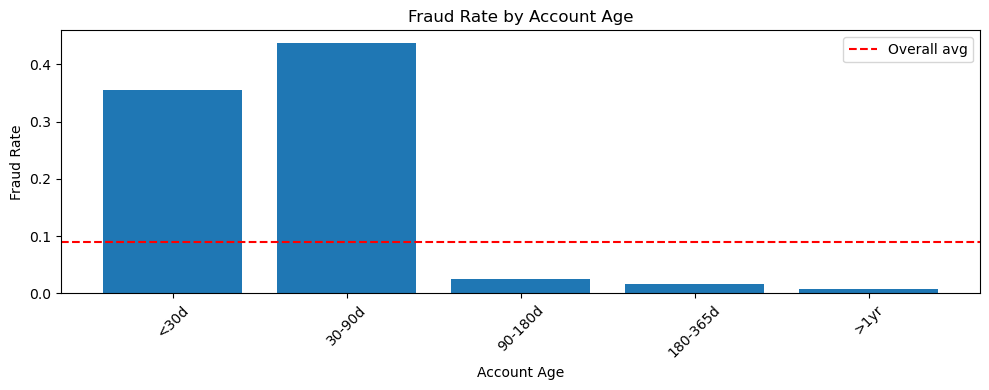

In [686]:
# Fraud rate by account age bucket
age_bucket = pd.cut(df['account_age_days'],
                            bins=[0, 30, 90, 180, 365, 730],
                            labels=['<30d', '30-90d', '90-180d', '180-365d', '>1yr'])

fraud_by_age_bucket = df.groupby(age_bucket, observed=True)['is_fraud'].mean()
print(fraud_by_age_bucket)

plt.figure(figsize=(10, 4))
plt.bar(range(len(fraud_by_age_bucket)), fraud_by_age_bucket.values)
plt.xticks(range(len(fraud_by_age_bucket)), fraud_by_age_bucket.index, rotation=45)
plt.xlabel('Account Age')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Account Age')
plt.axhline(y=df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg')
plt.legend()
plt.tight_layout()
plt.show()

chargeback_history_count
0    0.053852
1    0.930303
2    0.990991
Name: is_fraud, dtype: float64


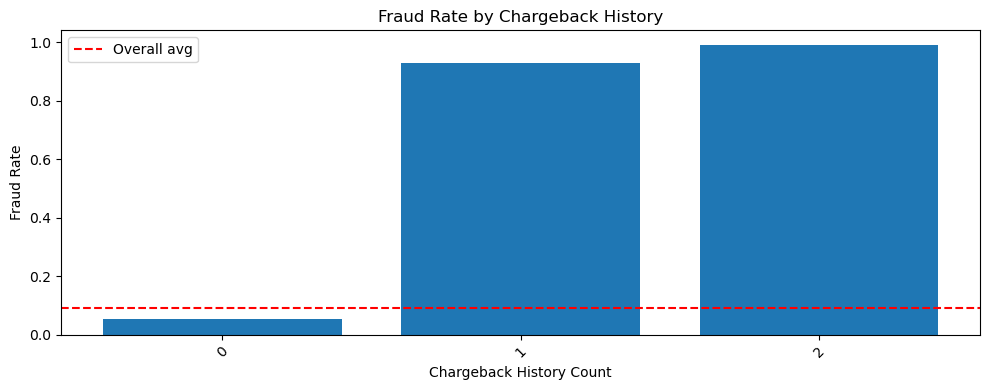

In [687]:
# Fraud rate by chargeback history
fraud_by_chargeback_history = df.groupby('chargeback_history_count', observed=True)['is_fraud'].mean()
print(fraud_by_chargeback_history)

plt.figure(figsize=(10, 4))
plt.bar(range(len(fraud_by_chargeback_history)), fraud_by_chargeback_history.values)
plt.xticks(range(len(fraud_by_chargeback_history)), fraud_by_chargeback_history.index, rotation=45)
plt.xlabel('Chargeback History Count')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Chargeback History')
plt.axhline(y=df['is_fraud'].mean(), color='r', linestyle='--', label='Overall avg')
plt.legend()
plt.tight_layout()
plt.show()

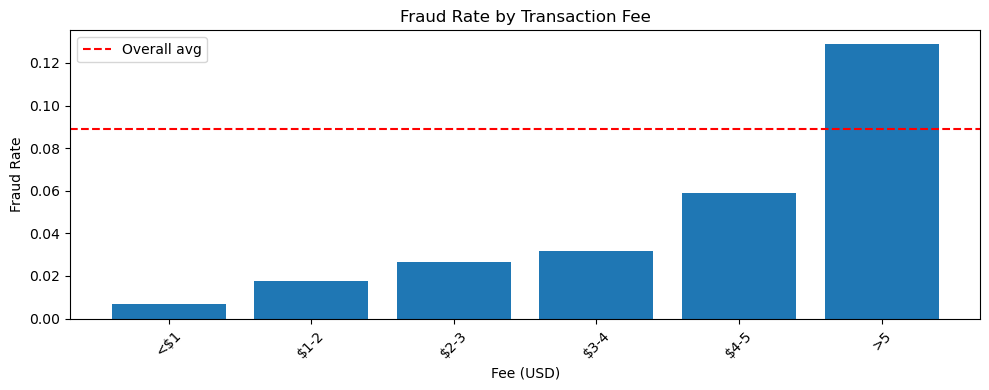

In [688]:
# fraud rate by bucketed fee 
fee_bucket = pd.cut(
    df['fee'],
    bins=[0, 1, 2, 3, 4, 5, 10],
    labels=['<$1', '$1-2', '$2-3', '$3-4', '$4-5', '>5'],
)

# Calculate fraud rate by fee bucket
fraud_by_fee = df.groupby(fee_bucket, observed=True)['is_fraud'].mean()

# Plot
plt.figure(figsize=(10, 4))
plt.bar(range(len(fraud_by_fee)), fraud_by_fee.values)
plt.xticks(range(len(fraud_by_fee)), fraud_by_fee.index, rotation=45)
plt.xlabel('Fee (USD)')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Transaction Fee')
plt.axhline(
    y=df['is_fraud'].mean(),
    color='r',
    linestyle='--',
    label='Overall avg'
)
plt.legend()
plt.tight_layout()
plt.show()


In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11137 entries, 0 to 11136
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   transaction_id             11137 non-null  object             
 1   customer_id                11137 non-null  object             
 2   timestamp                  11137 non-null  datetime64[ns, UTC]
 3   home_country               11137 non-null  object             
 4   source_currency            11137 non-null  object             
 5   dest_currency              11137 non-null  object             
 6   channel                    11137 non-null  object             
 7   amount_src                 11137 non-null  float64            
 8   amount_usd                 11137 non-null  float64            
 9   fee                        11137 non-null  float64            
 10  exchange_rate_src_to_dest  11137 non-null  float64            
 11  de

##  Save data 

In [691]:
# Save EDA data 

df_cleaned = df.copy()

df_cleaned.to_csv(r"C:\Users\pehlu\OneDrive\projects\Nova\Data\Nova_CleanedEDA_df.csv", index=False)